1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The predicted class is: No passing


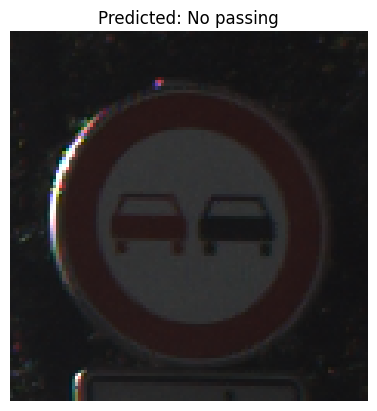

In [2]:
import pandas as pd
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

# Load the CSV file into a DataFrame
csv_path = 'classes_readable.csv'
class_df = pd.read_csv(csv_path, delimiter=';')

#Convert the DataFrame to a dictionary
class_labels = dict(zip(class_df['Index'], class_df['Class']))

# Print the dictionary to verify
#print(class_labels)

# Load the trained model
model = load_model('traffic_sign_cnn_model.keras')

# Function to preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((30, 30))
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Function to predict the class of the input image
def predict_sign(model, image_array):
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class[0]

def open_file_dialog():
    root = tk.Tk()
    root.withdraw()  # Close the root window
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    return file_path

def main():
    image_path = open_file_dialog()
    if image_path:  # If a file was selected
        image_array = preprocess_image(image_path)
        predicted_class = predict_sign(model, image_array)
        predicted_label = class_labels[predicted_class]
        print(f'The predicted class is: {predicted_label}')
        
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')
        plt.show()
    else:
        print("No file selected")


# Example usage
main()